In [177]:
import pandas as pd
import numpy as np

In [178]:
data1=pd.read_csv('data/measurements.csv')
display(data1.head())

data2=pd.read_excel('data/measurements2.xlsx')
display(data2.head())

print(data1.shape , data2.shape)



,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


(388, 12) (388, 12)


data1 = data2
due to format of the floats data 2 will be used

In [179]:
data2.columns=data2.columns.str.lower()
data2.columns=data2.columns.map(lambda x: x.replace(' ','_'))
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


if `refill_liters`  is nan the car were not be filled (=0)


In [180]:
data2.refill_liters=data2.refill_liters.fillna(0)
data2[~data2.specials.isna()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
40,12.4,4.0,55,21.5,7,AC rain,E10,1,1,0,0.0,NaN
41,4.5,5.0,29,21.5,7,AC,E10,1,0,0,0.0,NaN
50,11.8,5.1,29,21.5,5,rain,SP98,0,1,0,0.0,NaN
53,13.1,6.1,46,21.5,6,rain,SP98,0,1,0,0.0,NaN
55,153.5,4.9,82,21.5,3,rain,SP98,0,1,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,0.0,NaN
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,0.0,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,0.0,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,0.0,NaN


`specials` is a indicater if `AC`,`rain` or `sun` is true drop it 

In [181]:
data2=data2.drop('specials', axis=1)
data2

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.0,NaN
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.0,NaN
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.0,NaN
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.0,NaN


In [182]:
data3=data2[data1.gas_type != data2.refill_gas]
data3.refill_gas.value_counts(dropna=False)

NaN    375
Name: refill_gas, dtype: int64

All cars will be filled with the right gas if they are empty => drop refill_gas

In [183]:
data2=data2.drop('refill_gas',axis=1)
data2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0


In [184]:
data2.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
gas_type          0
ac                0
rain              0
sun               0
refill_liters     0
dtype: int64

If `tem_inside` is nan it will be asumed, that the temperature is equal the mean

In [185]:
data2.temp_inside=data2.temp_inside.fillna(data2.temp_inside.mean())
data2.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
gas_type         0
ac               0
rain             0
sun              0
refill_liters    0
dtype: int64

In [186]:


data2.temp_inside.value_counts()

21.500000    133
22.000000    102
22.500000     59
20.000000     25
21.000000     13
23.000000     13
21.929521     12
25.000000     12
24.500000      7
20.500000      4
24.000000      3
23.500000      2
25.500000      2
19.000000      1
Name: temp_inside, dtype: int64

In [187]:
import matplotlib.pyplot as plt

dat1=data2[data2.gas_type == 'E10'] 
dat2=data2[data2.gas_type == 'SP98'] 

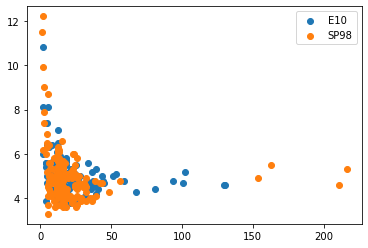

In [188]:
plt.scatter(dat1.distance,dat1.consume, label='E10')
plt.scatter(dat2.distance,dat2.consume, label='SP98')
plt.legend()

Due to the plot it will be made the assumption, that `consume` is a mean of the needed gas during the distance
($\frac{l}{100 km}$)

In [189]:
dat2[dat2.distance < 3]

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters
45,2.0,9.9,21,21.5,4,SP98,0,0,0,0.0
60,2.9,7.9,18,21.5,9,SP98,1,1,0,0.0
61,2.1,12.2,23,21.5,9,SP98,1,1,0,0.0
71,2.0,6.2,20,21.5,10,SP98,0,0,0,0.0
198,2.9,7.4,24,21.5,14,SP98,0,0,0,0.0
206,2.4,9.0,26,20.0,10,SP98,0,0,0,0.0
210,1.3,11.5,21,20.0,10,SP98,0,0,0,0.0


In [190]:
import seaborn as sns

<AxesSubplot:>

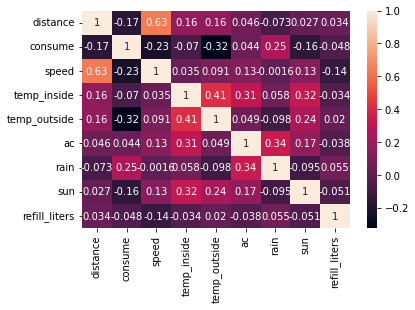

In [191]:
sns.heatmap(dat1.corr(),annot = True)

<AxesSubplot:>

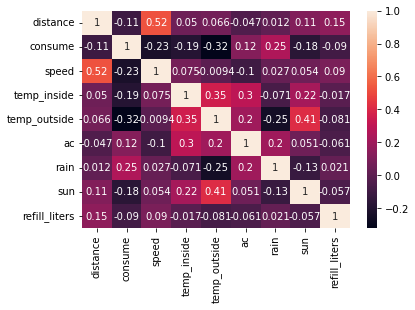

In [192]:
sns.heatmap(dat2.corr(),annot = True)

`consume` is the target value. The variable `refill_litters` only indicates if the car will be filled.


In [193]:
data=data2.drop('refill_liters', axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


First hypothesis: `E10` cars consume overall more than `SP98` cars

In [194]:
from scipy.stats import ttest_ind
stat, pval = ttest_ind(data[data.gas_type == 'E10'].consume,data[data.gas_type == 'SP98'].consume)
stat, pval

(0.3011626300254617, 0.7634526478628367)

pval is big => We have to reject that hypothesis

In [195]:
print(data[data.gas_type == 'E10'].consume.mean())
print(data[data.gas_type == 'SP98'].consume.mean())

4.931250000000001
4.899122807017543


Imput actual gas prices from spain

In [196]:
from bs4 import BeautifulSoup
import requests

url='https://autotraveler.ru/en/spain/trend-price-fuel-spain.html#.YjyU5ufMLcc'

response = requests.get(url)
response.status_code


200

In [197]:
soup = BeautifulSoup(response.content, "html.parser")
code=soup.select('td.text-nowrap')
code


[<td class="text-nowrap">Super 95</td>,
 <td class="text-nowrap">€ 1.799</td>,
 <td class="cell-down text-nowrap">- € 0.008<br/><sub><span class="arrow-down"></span>0.44 %</sub></td>,
 <td class="cell-up text-nowrap">+ € 0.215<br/><sub><span class="arrow-up"></span>13.57 %</sub></td>,
 <td class="cell-up text-nowrap">+ € 0.488<br/><sub><span class="arrow-up"></span>37.22 %</sub></td>,
 <td class="text-nowrap">Premium 98</td>,
 <td class="text-nowrap">€ 1.920</td>,
 <td class="cell-down text-nowrap">- € 0.005<br/><sub><span class="arrow-down"></span>0.26 %</sub></td>,
 <td class="cell-up text-nowrap">+ € 0.193<br/><sub><span class="arrow-up"></span>11.18 %</sub></td>,
 <td class="cell-up text-nowrap">+ € 0.465<br/><sub><span class="arrow-up"></span>31.96 %</sub></td>,
 <td class="text-nowrap">Diesel</td>,
 <td class="text-nowrap">€ 1.810</td>,
 <td class="cell-up text-nowrap">+ € 0.022<br/><sub><span class="arrow-up"></span>1.23 %</sub></td>,
 <td class="cell-up text-nowrap">+ € 0.339<b

code[1] is the E10 price and code[6]  is the SP98 price

In [198]:
import re
e10=code[1]
sp98=code[6]

e10=re.findall('\d\.\d*',str(e10))[0]
sp98=re.findall('\d\.\d*',str(sp98))[0]
e10,sp98

('1.799', '1.920')

Second hypothesis: The usage of `E10` cars is cheaper then driving the `SP98` cars

In [199]:
def mult(row):
    if row.gas_type == 'E10':
        return float(row.consume)*float(e10)
    else:
        return float(sp98)*row.consume

In [200]:
data['cost']=data.apply(mult ,axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,cost
0,28.0,5.0,26,21.5,12,E10,0,0,0,8.9950
1,12.0,4.2,30,21.5,13,E10,0,0,0,7.5558
2,11.2,5.5,38,21.5,15,E10,0,0,0,9.8945
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.0161
4,18.5,4.5,46,21.5,15,E10,0,0,0,8.0955
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,7.1040
384,16.1,4.3,38,25.0,31,SP98,1,0,0,8.2560
385,16.0,3.8,45,25.0,19,SP98,0,0,0,7.2960
386,15.4,4.6,42,25.0,31,SP98,1,0,0,8.8320


In [203]:
stat, pval = ttest_ind(data[data.gas_type == 'E10'].cost,data[data.gas_type == 'SP98'].cost)
stat, pval

(-2.6633244791514907, 0.008061210426902018)

Result shows E10 is cheaper